# Ask 
**1. Business Task:**
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

**2. Business Objectives:**
* What are the trends identified?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

**3. Stakeholders**
* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

# Prepare 
**1. Information on Data Source:**
* The data is publicly available on Kaggle: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) and stored in 18 csv files.
* Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
* 30 FitBit users who consented to the submission of personal tracker data.

**2. Limitations of Data Set:**
* Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
* Sample size of 33 female FitBit users is not representative of the entire female population.
* As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

**3. Is Data ROCCC?:**
A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

* Reliable - LOW - Not reliable as it only has 33 respondents
* Original - LOW - Third party provider (Amazon Mechanical Turk)
* Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
* Current - LOW - Data is 5 years old and is not relevant
* Cited - LOW - Data collected from third party, hence unknown

# Process 
We are using Python to prepare and process the data.

**Preparing the Environment:**
The numPy, pandas, matplotlib, seaborn, datetime packages are installed and aliased for easy reading.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os


Importing the dataset with the required files.

**Data cleaning and manipulation**

* Observe and familiarize with data
* Check for null or missing values
* Perform sanity check of data

In [2]:
daily_df = pd.read_csv("/kaggle/input/bellabeat/dailyActivity_merged.csv")
step_df = pd.read_csv("/kaggle/input/bellabeat/sleepDay_merged.csv")
hourly_step_df = pd.read_csv("/kaggle/input/bellabeat/hourlySteps_merged.csv")

In [3]:
print(daily_df)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162       8.500000         8.500000   
1    1503960366    4/13/2016       10735       6.970000         6.970000   
2    1503960366    4/14/2016       10460       6.740000         6.740000   
3    1503960366    4/15/2016        9762       6.280000         6.280000   
4    1503960366    4/16/2016       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2016       10686       8.110000         8.110000   
936  8877689391     5/9/2016       20226      18.250000        18.250000   
937  8877689391    5/10/2016       10733       8.150000         8.150000   
938  8877689391    5/11/2016       21420      19.559999        19.559999   
939  8877689391    5/12/2016        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

In [4]:
print(daily_df.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

In [5]:
print(daily_df.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [6]:
print(step_df)

             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0    

In [7]:
print(step_df.describe())

                 Id  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count  4.130000e+02         413.000000          413.000000      413.000000
mean   5.000979e+09           1.118644          419.467312      458.639225
std    2.060360e+09           0.345521          118.344679      127.101607
min    1.503960e+09           1.000000           58.000000       61.000000
25%    3.977334e+09           1.000000          361.000000      403.000000
50%    4.702922e+09           1.000000          433.000000      463.000000
75%    6.962181e+09           1.000000          490.000000      526.000000
max    8.792010e+09           3.000000          796.000000      961.000000


On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. 

In [8]:
print(step_df.isnull().sum())

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


Convert ActivityDate to datatime64 dtype. Convert format of ActivityDate to yyyy-mm-dd.

In [9]:
daily_df["ActivityDate"]=pd.to_datetime(daily_df["ActivityDate"])
print(type(daily_df["ActivityDate"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


SleepDay in step_df is same as ActivityDate in daily_df. SleepDay will be converted to ActivityDate so that later it can be use to merge the two df. 

In [10]:
step_df.rename(columns={'SleepDay':'ActivityDate'}, inplace=True)
print(step_df)

             Id           ActivityDate  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0    

In [11]:
step_df["ActivityDate"]=pd.to_datetime(step_df["ActivityDate"])
print(type(step_df["ActivityDate"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/tmp/ipykernel_18/3083451483.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  step_df["ActivityDate"]=pd.to_datetime(step_df["ActivityDate"])


In [12]:
unique_id=daily_df["Id"].nunique()
print(unique_id)

33


In [13]:
unique_id_step=step_df["Id"].nunique()
print(unique_id_step)

24


In [14]:
merged_df=pd.merge(daily_df,step_df, on=["Id","ActivityDate"], how="left")

In [15]:
print(merged_df)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
938  8877689391   2016-05-08       10686       8.110000         8.110000   
939  8877689391   2016-05-09       20226      18.250000        18.250000   
940  8877689391   2016-05-10       10733       8.150000         8.150000   
941  8877689391   2016-05-11       21420      19.559999        19.559999   
942  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

In [16]:
unique_date=merged_df["ActivityDate"].nunique()
print(unique_date)

31


In [17]:
print(merged_df.isnull().sum())

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
TotalSleepRecords           530
TotalMinutesAsleep          530
TotalTimeInBed              530
dtype: int64


Fill the null values with zero. 

In [18]:
merged_df["TotalSleepRecords"]=merged_df["TotalSleepRecords"].fillna(0)
merged_df["TotalMinutesAsleep"]=merged_df["TotalMinutesAsleep"].fillna(0)
merged_df["TotalTimeInBed"]=merged_df["TotalTimeInBed"].fillna(0)
print(merged_df.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64


* There is no typo, Null or missing values.
* Data frame has 940 rows and 15 columns.
* ActivityDate is wrongly classified as object dtype and was converted to datetime64 dtype.
* There are 33 unique IDs and 31 days of data. 

# Analyze

In [19]:
g = merged_df.groupby("Id")
max_values = g[["TotalSteps", "TotalDistance", "Calories", "TotalMinutesAsleep", "TotalTimeInBed"]].max()


In [20]:
mean_values=g[["TotalSteps","TotalDistance","Calories", "TotalMinutesAsleep", "TotalTimeInBed"]].mean()

Since we don't have any demographic variables from our sample we want to determine the type of users with the data we have. We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.

Classification has been made per the following article [Healthy LifeStyle](https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/)

In [21]:
def Category_User (TotalSteps):
  if TotalSteps<5000:
    return "Sedentary"
  elif TotalSteps>5000 and TotalSteps<7499:
    return "Light Active"
  elif TotalSteps>7500 and TotalSteps<9999:
    return "Fairly Active"
  else:
    return "Very Active"

merged_df["UserType"]=merged_df["TotalSteps"].apply(Category_User)

In [22]:
days={
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}
merged_df["DayofWeek"]=merged_df["ActivityDate"].dt.dayofweek
merged_df["DayofWeek"]=merged_df["DayofWeek"].map(days)

Calculate the time spent in bed but not slept. 

In [23]:
merged_df["InBedNotSlept"]=merged_df["TotalTimeInBed"]-merged_df["TotalMinutesAsleep"]

In [24]:
print(merged_df["InBedNotSlept"].max())
print(merged_df["InBedNotSlept"].mean())
print(merged_df["InBedNotSlept"].min())

371.0
17.1558854718982
0.0


Sleep Latency is the amount of time spent in bed not asleep. 

In [25]:
def sleeplatency(InBedNotSlept):
  if InBedNotSlept<15:
    return "Short Latency"
  elif InBedNotSlept>15 and InBedNotSlept<30:
    return "Moderate Latency"
  elif InBedNotSlept>30:
    return "Long Latency"

merged_df["SleepLatency"]=merged_df["InBedNotSlept"].apply(sleeplatency)

# Share

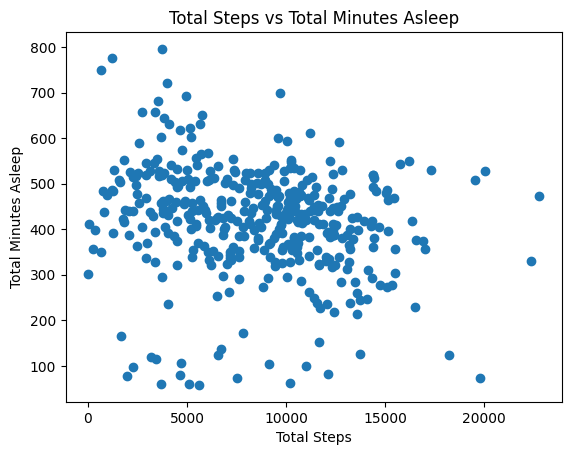

In [26]:
filtered_df = merged_df[merged_df["TotalMinutesAsleep"] > 0]

plt.scatter(filtered_df["TotalSteps"], filtered_df["TotalMinutesAsleep"])
plt.title("Total Steps vs Total Minutes Asleep")
plt.xlabel("Total Steps")
plt.ylabel("Total Minutes Asleep")
plt.show()

There is no correlation between daily activity level based on steps and the amount of minutes users sleep a day.

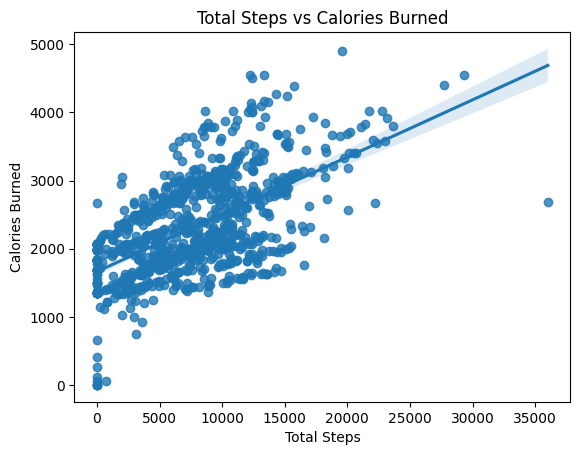

In [27]:
sns.regplot(x='TotalSteps', y='Calories', data=merged_df)

plt.title('Total Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()

We can see a positive correlation between steps and calories burned. As more steps walked the more calories may be burned.

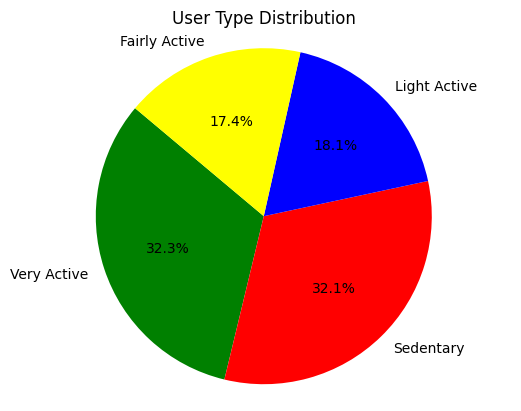

In [28]:
user_type_count=merged_df["UserType"].value_counts()
color_mapping={
    "Fairly Active":"yellow",
    "Light Active":"blue",
    "Sedentary":"red",
    "Very Active":"green"}

colours=[color_mapping[category] for category in user_type_count.index]

plt.pie(user_type_count, labels=user_type_count.index, autopct='%1.1f%%', startangle=140, colors=colours)
plt.axis('equal')
plt.title("User Type Distribution")
plt.show()

We can see that users are fairly distributed by their activity considering the daily amount of steps.

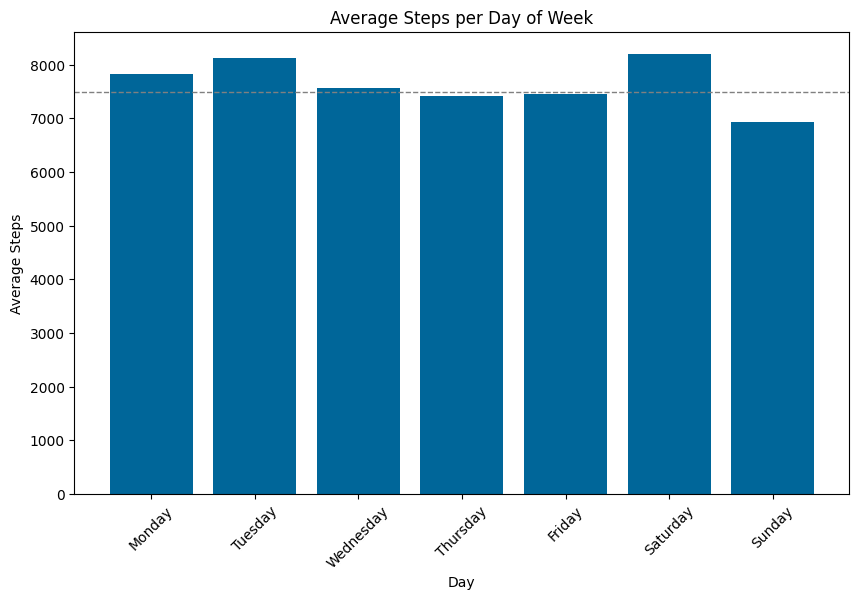

In [29]:
average_steps_per_day = merged_df.groupby('DayofWeek')['TotalSteps'].mean()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
average_steps_per_day = average_steps_per_day.reindex(ordered_days)

plt.figure(figsize=(10, 6))
plt.bar(average_steps_per_day.index, average_steps_per_day, color="#006699")

plt.title("Average Steps per Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)

benchmark = 7500 
plt.axhline(y=benchmark, color='gray', linestyle='--', linewidth=1)

plt.show()

Users walk daily the recommended amount of steps of 7500 besides Sunday and Thursday. 

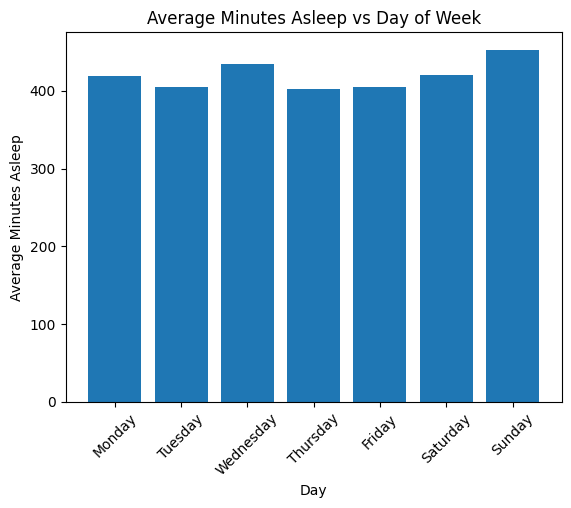

In [30]:
filter_df=merged_df[merged_df["TotalMinutesAsleep"]>0]
average_sleep=filter_df.groupby("DayofWeek")["TotalMinutesAsleep"].mean()

days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
average_sleep=average_sleep.reindex(days)

plt.bar(average_sleep.index, average_sleep)
plt.title("Average Minutes Asleep vs Day of Week")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Average Minutes Asleep")
plt.show()

Users don't sleep the recommended amount of time - 8 hours

**Days used smart device**
* We have seen some trends in activity, sleep and calories burned, we want to see how often do the users in our sample use their device. That way we can plan our marketing strategy and see what features would benefit the use of smart devices.

* We will calculate the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the date interval is 31 days:

1. high use - users who use their device between 21 and 31 days.
2. moderate use - users who use their device between 10 and 20 days.
3. low use - users who use their device between 1 and 10 days.

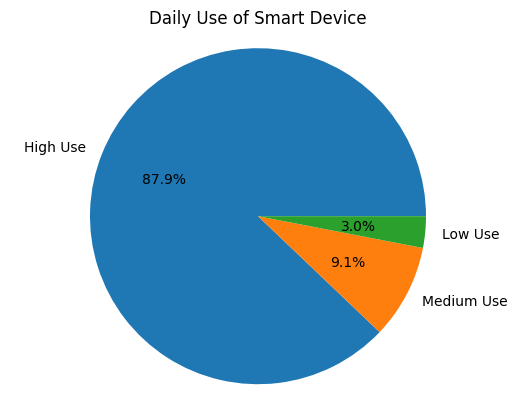

In [31]:
activity_day_peruser=merged_df.groupby("Id")["ActivityDate"].nunique()

def activity(activity_day_peruser):
  if activity_day_peruser>21:
    return "High Use"
  elif activity_day_peruser<21 and activity_day_peruser>10:
    return "Medium Use"
  else:
    return "Low Use"

activitylevel=activity_day_peruser.apply(activity)
activity_level_count=activitylevel.value_counts()

plt.pie(activity_level_count, labels=activity_level_count.index, autopct='%1.1f%%')
plt.title("Daily Use of Smart Device")
plt.axis("equal")
plt.show()

Analyzing our results we can see that

* 87.9% of the users of our sample use their device frequently - between 21 to 31 days.
* 9.1% use their device 11 to 20 days.
* 3% of our sample use really rarely their device

We will create a new data frame calculating the total amount of minutes users wore the device every day and creating three different categories:

* All day - device was worn all day.
* More than half day - device was worn more than half of the day.
* Less than half day - device was worn less than half of the day.

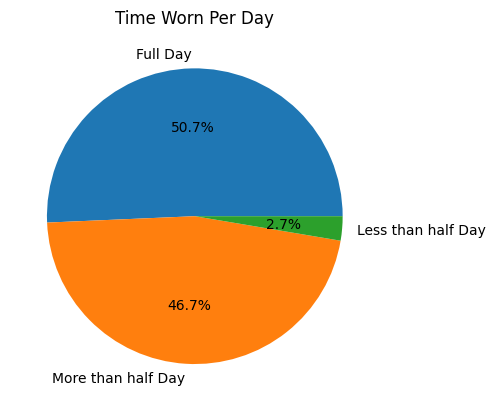

In [32]:
merged_df["TotalMins"] = merged_df["SedentaryMinutes"]+merged_df["VeryActiveMinutes"]+merged_df["FairlyActiveMinutes"]+merged_df["LightlyActiveMinutes"]
merged_df["PercentWorn"]=(merged_df["TotalMins"]/1440)*100

def Usage(PercentWorn):
  if PercentWorn==100:
    return "Full Day"
  elif PercentWorn>50 and PercentWorn <100:
    return "More than half Day"
  else:
    return "Less than half Day"

merged_df["Usage"]=merged_df["PercentWorn"].apply(Usage)

usage_count=merged_df["Usage"].value_counts()
plt.pie(usage_count, labels=usage_count.index, autopct="%1.1f%%")
plt.title("Time Worn Per Day")
plt.show()

We can see that 50.7% of the total of users wear the device all day long, 46.7% more than half day long and just 2.7% less than half day.

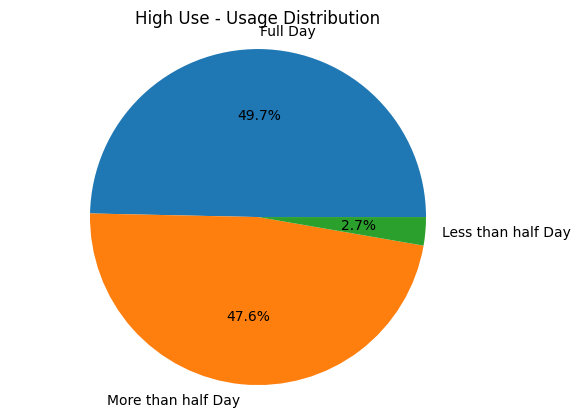

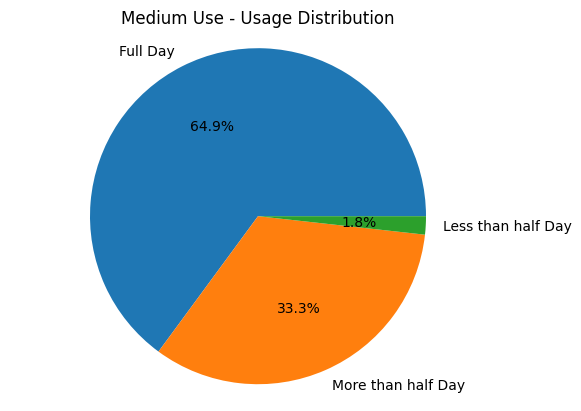

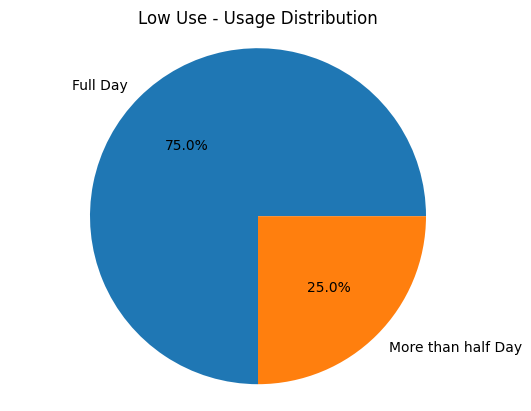

In [33]:
activity_level = activity_day_peruser.apply(activity)
merged_df['activity_level'] = merged_df['Id'].map(activity_level)

activity_levels = ['High Use', 'Medium Use', 'Low Use']

for level in activity_levels:
    filtered_df = merged_df[merged_df['activity_level'] == level]
    usage_counts = filtered_df['Usage'].value_counts()
    if not usage_counts.empty:
        plt.figure()
        plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%')
        plt.title(f"{level} - Usage Distribution")
        plt.axis("equal")  
        plt.show()


From the analysis we can say that - 

* Among High Use Users - 49.7 % wear it for entire day, 47.6% for more than half day and 2.7 % for less than half day. 
* Among Medium Use Users - 64.9% wear it for entire day, 33.3% for more than half day and  1.8% for less than half day. 
* Among Low Use Users - 75% wear it for entire day and 25% for more than half day.

In [34]:
print(hourly_step_df.columns)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')


Convert the ActivityHour to datetime. 

In [35]:
hourly_step_df["ActivityHour"]=pd.to_datetime(hourly_step_df["ActivityHour"])
print(type(hourly_step_df["ActivityHour"][0]))

/tmp/ipykernel_18/2594453112.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_step_df["ActivityHour"]=pd.to_datetime(hourly_step_df["ActivityHour"])


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [36]:
hourly_step_df["Hour"]=hourly_step_df["ActivityHour"].dt.hour
print(type(hourly_step_df["Hour"][0]))

<class 'numpy.int32'>


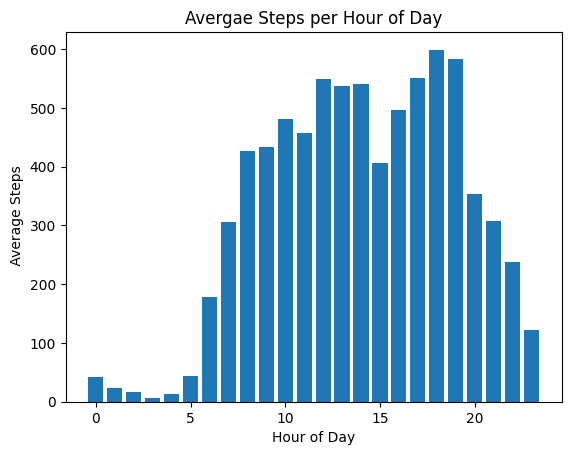

In [37]:
avg_step=hourly_step_df.groupby("Hour")["StepTotal"].mean()

plt.bar(avg_step.index, avg_step)

plt.title("Avergae Steps per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel(" Average Steps")

plt.show()

We can see that users are more active between 8am and 7pm. Walking more steps during lunch time from 12pm to 2pm and evenings from 5pm and 7pm.

# Act

* In order for us to respond to our business task and help Bellabeat on their mission, based on our results, I would advice to use own tracking data for further analysis. Datasets used have a small sample and can be biased since we didn't have any demographic details of users
* That being said, after our analysis we have found different trends that may help our online campaign and improve Bellabeat app:
1. **Daily notification on steps and posts on app** - We classified users into 4 categories and saw that the average of users walk more than 7,500 steps daily besides Sunday and Thursday. We can encourage customers to reach at least daily recommended steps by CDC - 8.000 sending them alarms if they haven't reached the steps and creating also posts on our app explaining the benefits of reaching that goal. As CDC explains the more steps you walk the lower is the mortality rate. We also saw a positive correlation between steps and calories.

2. **Notification and sleep techniques** - Based on our results we can see that users sleep less than 8 hours a day. They could set up a desired time to go to sleep and receive a notification minutes before to prepare to sleep. Also offer helpfull resources to help customers sleep - ex. breathing advises, podcasts with relaxing music, sleep techniques. 

3. **Reward system** - We are aware that some people don't get motivated by notifications so we could create a kind of game on our app for a limited period of time. Game would consist in reaching different levels based on amount of steps walked every day. You need to maintain activity level for a period of time (maybe a month) to pass to the next level. For each level you would win certain amount of stars that would be redeemable for merchandise or discount on other Bellabeat products.